# Notebook 9: Prediction using OpenCV Modeling and CNN 

### Setting up working directory:

In [1]:
AED_C_dir = 'ESC50/Dataset'
# Working directory can be setup externally as long as both 'tract' and 'ptne' folders are present within the directory.
# Working directory must also contain the Metadata CSV file.

### Importing necessary libraries:

In [2]:
import pandas as pd
import h5py
import os
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import librosa
import cv2
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sn

2022-09-29 21:50:51.195605: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sumon/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-09-29 21:50:51.195632: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Reading the Metadata file:

In [3]:
meta_data = pd.read_csv(AED_C_dir+'/metadata.csv')

### Preparing the data for Modeling 

In [4]:
save_loc = 'ESC50/Dataset/Dataset_image/'
images = []
labels = []
unique_labels = meta_data['category'].unique()
for i in range(len(meta_data)):
        name=meta_data['filename'][i].split('.')[0]
        a = cv2.resize(cv2.imread(save_loc+'E_'+name+'.jpg'),(64, 64))
        b = cv2.resize(cv2.imread(save_loc+'f_tract_'+name+'.jpg'),(64, 64))
        c = cv2.resize(cv2.imread(save_loc+'s_tract_'+name+'.jpg'),(64, 64))
        images.append(np.vstack((a.T, b.T, c.T)).T)
        labels.append(np.where(unique_labels == meta_data['category'][i])[0][0])
images = np.array(images)
images = images.astype('float32') / 255
labels = to_categorical(np.array(labels))

#### Dividing data into Training and Test sets

In [5]:
train_images, val_images, train_labels, val_labels = train_test_split( 
                                                       images, labels, train_size = 0.85, 
                                                       test_size = 0.15, random_state = 42)

#### Confirming Traing and Test sets

In [6]:
len(train_labels), len(val_labels)

(306, 54)

### Modeling

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding ='same',
                 input_shape = (64, 64, 9)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding ='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation = 'softmax'))
model.compile(optimizers.RMSprop(lr= 0.0005,decay=1e-6),loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2624      
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                        

2022-09-29 21:50:52.667344: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-29 21:50:52.667379: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sumonpc): /proc/driver/nvidia/version does not exist
2022-09-29 21:50:52.667713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/sumon/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Model Fitting

In [8]:
history = model.fit(train_images, train_labels, epochs = 80, batch_size = 64)

Epoch 1/80
5/5 [==============================] - 2s 326ms/step - loss: 2.3701 - accuracy: 0.1340
Epoch 2/80
5/5 [==============================] - 2s 332ms/step - loss: 2.1371 - accuracy: 0.1601
Epoch 3/80
5/5 [==============================] - 2s 324ms/step - loss: 1.9905 - accuracy: 0.2124
Epoch 4/80
5/5 [==============================] - 2s 321ms/step - loss: 1.9498 - accuracy: 0.2059
Epoch 5/80
5/5 [==============================] - 2s 317ms/step - loss: 1.9491 - accuracy: 0.2680
Epoch 6/80
5/5 [==============================] - 2s 325ms/step - loss: 1.8484 - accuracy: 0.3105
Epoch 7/80
5/5 [==============================] - 2s 328ms/step - loss: 1.6115 - accuracy: 0.3725
Epoch 8/80
5/5 [==============================] - 2s 324ms/step - loss: 1.7544 - accuracy: 0.3399
Epoch 9/80
5/5 [==============================] - 2s 325ms/step - loss: 1.7151 - accuracy: 0.3529
Epoch 10/80
5/5 [==============================] - 2s 329ms/step - loss: 1.5251 - accuracy: 0.4118
Epoch 11/80
5/5 [==

#### Model Evaluation Plot

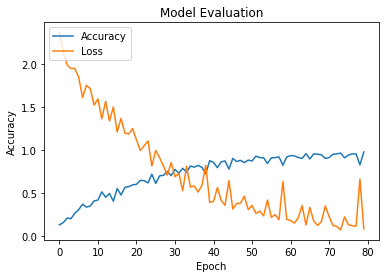

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Evaluation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc = 'upper left')
plt.show()

#### Defining functions for Prediction:

In [10]:
def save_spectrogram(save_loc, name, Spectrogram):
    plt.interactive(False)
    fig = plt.figure(figsize=[0.72, 0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = Spectrogram #spectrogram
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max)) # Displaying spectrogram as an image
    filename  = save_loc +name+ '.jpg'
    plt.savefig(filename, dpi = 400, bbox_inches='tight',pad_inches=0) # Saving spectrogram as an image
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del name, fig, ax, S

#### Save Spectrograms as images in Dataset_image folder:

In [11]:
def predict(save_loc, name):
  images = []
  hf = h5py.File(AED_C_dir+'/tracts/'+name+'.hdf5', 'r')
  S_E = np.array(hf.get('E'))
  save_spectrogram(save_loc, 'E', S_E)
  S_f_tract= np.array(hf.get('f_tract'))
  save_spectrogram(save_loc, 'f_tract', S_f_tract)
  S_s_tract= np.array(hf.get('s_tract'))
  save_spectrogram(save_loc, 's_tract', S_s_tract)
  a = cv2.resize(cv2.imread(save_loc+'E.jpg'),(64, 64))
  b = cv2.resize(cv2.imread(save_loc+'f_tract.jpg'),(64, 64))
  c = cv2.resize(cv2.imread(save_loc+'s_tract.jpg'),(64, 64))
  images.append(np.vstack((a.T, b.T, c.T)).T)
  pred = model.predict(np.array(images))
  return(unique_labels[np.argmax(pred, axis = 1)])

### Prediction

In [14]:
save_loc = 'ESC50/Dataset/Dataset_image/'
sl = int(input("Enter file number (Please enter a value between 0 to 359): "))
name = meta_data['filename'][sl].split('.')[0]
predicted_label = predict(save_loc, name)
print('The True Category is:', meta_data.category[sl])
print('The Predicted Category is:', predicted_label)

Enter file number (Please enter a value between 0 to 359): 15
1/1 [==============================] - 0s 14ms/step
The True Category is: snoring
The Predicted Category is: ['snoring']


**Note:** For the Prediction, the working directory must contain the *tract* folder containing all the HDF5 files because the Prediction Algorithm will need the perticular HDF5 file that is being tested and generate concatenated arrays from the exported Spectrum Images of the *tract data* and then test it against the trained model.